What i have accomplished so far:

- Data cleaning and analysis: 
    - Winrate for champions, composition(both champions and roles), first objectives
    - Banrate analysis
    - Relevance for each objective
- Correlation analysis (incomplete)
- Data modeling using random forest: 
    - With every information: 97% accuracy and 
    - With only picks and first early objectives, simulating risk and gambling analysis (71%)

- To be done: Had the idea to analyse which heroes are more early game, mid game or late game 

# Step one: Data analysis and cleaning

In [104]:
#from jupyter_datatables import init_datatables_mode

#init_datatables_mode()

In [105]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

In [106]:
# Reading the main data
df = pd.read_csv('games.csv')

print(f'Shape: {df.shape}')
df.columns

Shape: (51490, 61)


Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [107]:
# Reading the first champions json
import json
f = open('champion_info.json')
champs = json.load(f)
rows = []
champs_1_df = pd.DataFrame(columns=['id', 'name'])
for champion_id, champion_data in champs['data'].items():
    champ_id = int(champion_id)
    name = champion_data['name']
    rows.append({'id': champ_id, 'name': name})
    
champs_1_df['name'] = [row['name'] for row in rows]
champs_1_df['id'] = [row['id'] for row in rows]

f.close()
champs_1_df

,id,name
0,1,Annie
1,2,Olaf
2,3,Galio
3,4,Twisted Fate
4,5,Xin Zhao
...,...,...
133,429,Kalista
134,432,Bard
135,497,Rakan
136,498,Xayah


In [108]:
# The second json's structure is a little bit different, the id's are not on the first element
# of the tuple, instead, they are inside the second one

f = open('champion_info_2.json')
champs_2 = json.load(f)
rows = []
champs_df = pd.DataFrame(columns=['id', 'name'])
for _, champion_data in champs_2['data'].items():
    # There is one specific dirty data, where the id -1 and the rest is just filled with None
    if float(champion_data['id']) < 0:
        continue
    champ_id = int(champion_data['id'])
    name = champion_data['name']
    role = champion_data['tags']
    rows.append({'id': champ_id, 'name': name, 'role': role})
champs_df['name'] = [row['name'] for row in rows]
champs_df['id'] = [row['id'] for row in rows]
champs_df['role'] = [row['role'] for row in rows]
f.close()
champs_df.sort_values('id',inplace=True)
champs_df

,id,name,role
57,1,Annie,[Mage]
52,2,Olaf,"[Fighter, Tank]"
89,3,Galio,"[Tank, Mage]"
73,4,Twisted Fate,[Mage]
112,5,Xin Zhao,"[Fighter, Assassin]"
...,...,...,...
37,429,Kalista,[Marksman]
68,432,Bard,"[Support, Mage]"
43,497,Rakan,[Support]
5,498,Xayah,[Marksman]


In [109]:
# Note that there arent any null values since the data was previously cleaned by its author
df.isna().sum().unique()

array([0], dtype=int64)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 8.67856e-07] [loc=1832.363 scale=512.013]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 1.38412e-05] [loc=190.000 scale=1642.363]
[distfit] >INFO> [pareto    ] [1.36 sec] [RSS: 2.72603e-05] [loc=-0.089 scale=190.089]
[distfit] >INFO> [dweibull  ] [0.97 sec] [RSS: 9.35604e-07] [loc=1829.405 scale=407.208]
[distfit] >INFO> [t         ] [1.26 sec] [RSS: 8.67863e-07] [loc=1832.365 scale=512.014]
[distfit] >INFO> [genextreme] [5.65 sec] [RSS: 2.35144e-05] [loc=4727.278 scale=7.358]
[distfit] >INFO> [gamma     ] [1.25 sec] [RSS: 9.08094e-07] [loc=-8623.595 scale=25.800]
[distfit] >INFO> [lognorm   ] [2.07 sec] [RSS: 2.51632e-05] [loc=190.000 scale=1.833]
[distfit] >INFO> [beta      ] [2.87 sec] [RSS: 8.77897e-07] [loc=-19215.293 scale=34460.334]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 1.22606e-05] [loc=190.000 scale=4538.000]
[distfit] >INFO> [loggamma  ] [0.66 sec] [RSS: 9.10103e-07] [loc=

(<Figure size 1440x1080 with 1 Axes>,
 <Axes: title={'center': '\nnorm(loc=1832.36, scale=512.013)'}, xlabel='Values', ylabel='Frequency'>)

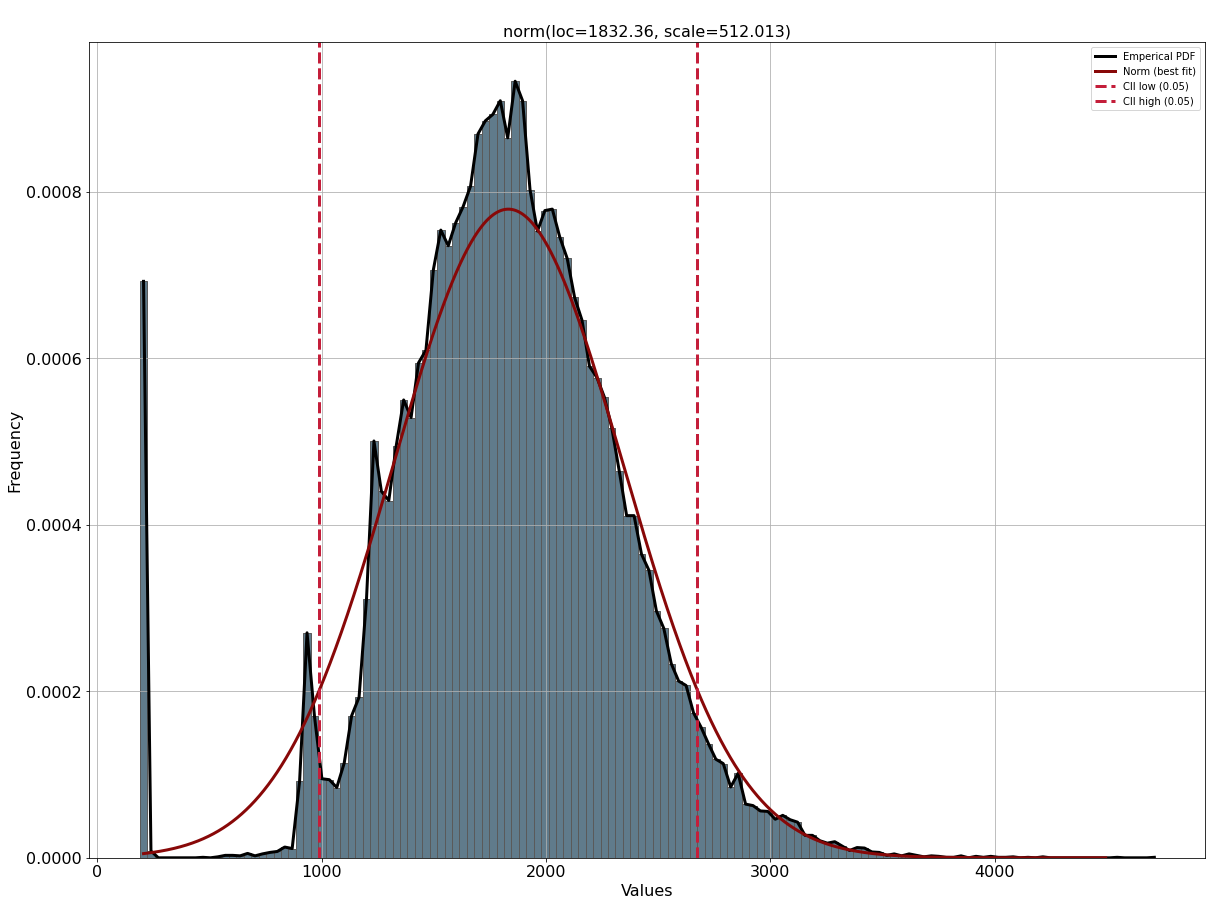

In [110]:
# Distribution
from distfit import distfit


dfit = distfit(todf=True)
results = dfit.fit_transform(df['gameDuration'])

dfit.plot()

Note that remaked matches are included in this dataframe, so i will remove them. I will remove the match periods from 3 to 15 minutes. Above that ff is possible and actual wins are unlikely. There may be some low-time ff due to disconnect but, in my interpretation, removing them is reasonable

In [111]:
remake = df[df['gameDuration'] <= 300].shape[0]
between_remake_and_surrender = df[((df['gameDuration'] > 300) & (df['gameDuration']<900))].shape[0]

print("remake: ", remake,"  between remake and surrender: ", between_remake_and_surrender)

remake:  1195   between remake and surrender:  114


In [112]:
# Removing potential remake matches
df = df[~((df['gameDuration'] < 900) & (df['gameDuration']>0))]
df_model = df.copy()

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 2.50123e-07] [loc=1873.638 scale=448.629]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 9.88751e-06] [loc=901.000 scale=972.638]
[distfit] >INFO> [pareto    ] [2.62 sec] [RSS: 1.64451e-05] [loc=-0.184 scale=901.184]
[distfit] >INFO> [dweibull  ] [1.79 sec] [RSS: 7.53606e-07] [loc=1857.378 scale=380.519]
[distfit] >INFO> [t         ] [0.88 sec] [RSS: 2.50131e-07] [loc=1873.640 scale=448.629]
[distfit] >INFO> [genextreme] [2.34 sec] [RSS: 3.70552e-05] [loc=902.920 scale=8.774]
[distfit] >INFO> [gamma     ] [0.44 sec] [RSS: 1.42055e-07] [loc=-158.783 scale=99.201]
[distfit] >INFO> [lognorm   ] [2.77 sec] [RSS: 1.41342e-07] [loc=-1169.975 scale=3011.042]
[distfit] >INFO> [beta      ] [2.00 sec] [RSS: 1.42152e-07] [loc=-157.000 scale=557267672.014]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 1.17631e-05] [loc=901.000 scale=3827.000]
[distfit] >INFO> [loggamma  ] [0.99 sec] [RSS: 2.69573e-07] [

(<Figure size 1440x1080 with 1 Axes>,
 <Axes: title={'center': '\nlognorm(s=0.14672, loc=-1169.98, scale=3011.04)'}, xlabel='Values', ylabel='Frequency'>)

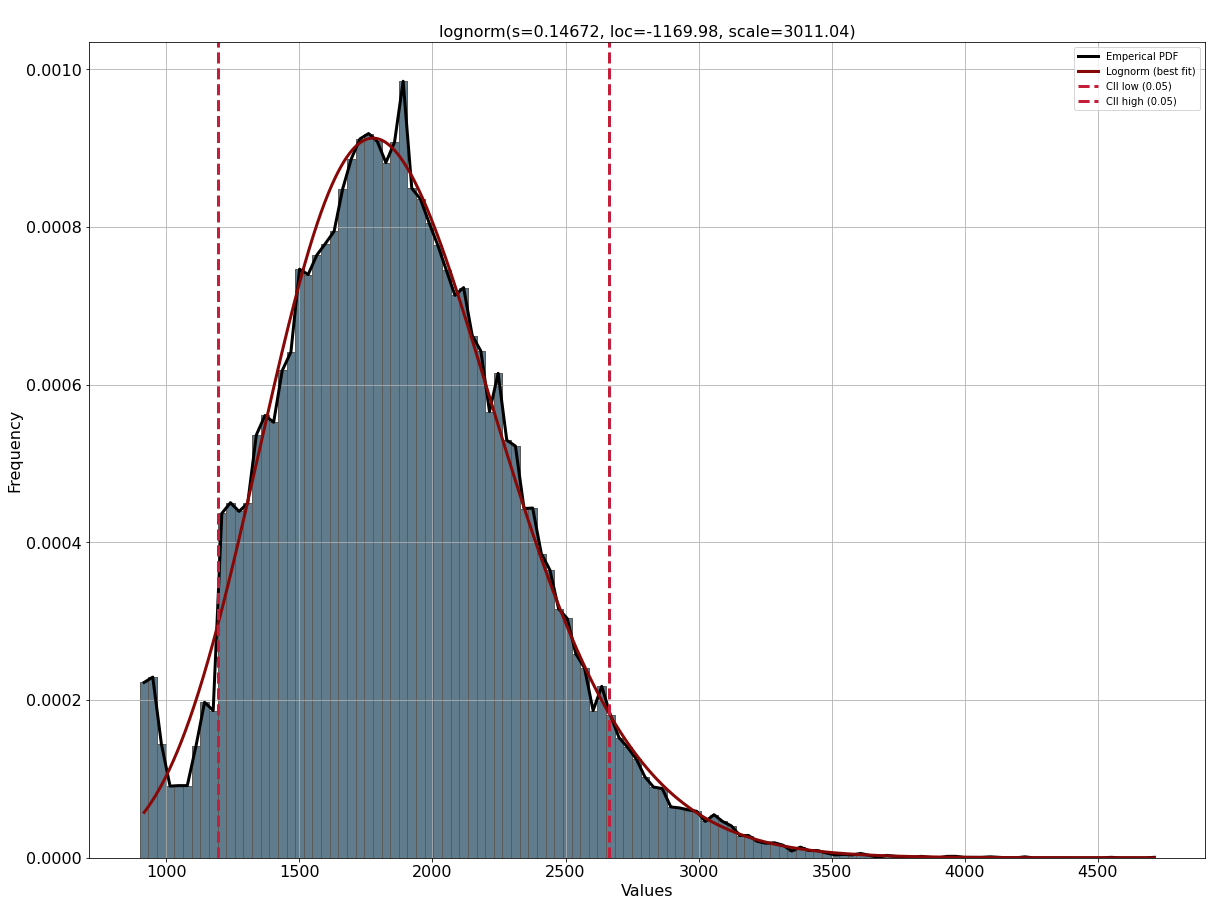

In [113]:
# Ploting distribution again
from distfit import distfit


dfit = distfit(todf=True)
results = dfit.fit_transform(df['gameDuration'])
dfit.plot()


### Analyzing champions' win percentage and pick/ban rate

In [114]:
# Analyzing champions' win percentage and pick/ban rate

champs_t1, champs_t2, bans_t1, bans_t2 = [],[],[],[]

# Getting columns that contains champions' appearances 'automatically'

# When testing, checking whether its alread in champ_t1 became necessary since compyling it twice
# would duplicate the list's values
for column in df.columns:
    if 'id' in column:
        if 't1' in column and column not in champs_t1:
            champs_t1.append(column)
        elif 't2' in column and column not in champs_t2:
            champs_t2.append(column)
    if 'ban' in column:
        if 't1' in column and column not in bans_t1:
            bans_t1.append(column)
        elif 't2' in column and column not in bans_t2:
            bans_t2.append(column)

In [115]:
# Extracting picked/banned percentage and getting the relevance:
# how many times a champion is picked when its not banned
# (number of picks) / ((total games) - (number of bans))
# In my opinion, this number would infer the best bans

df['picks'] = df[champs_t1 + champs_t2].values.tolist()
df['bans'] = df[bans_t1 + bans_t2].values.tolist()

df['comp'] = df[champs_t1 + champs_t2].values.tolist()

# I struggled a lot to assign lists/arrays to specific cells, so here's the solution i came up with
df['win/lose'] = np.where(df['winner'] == 1, '[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]', '[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]')
df['win/lose'] = df['win/lose'].apply(ast.literal_eval)
df_exploded = df.explode(['picks','bans','win/lose'])

pick_id = df_exploded['picks'].value_counts().reset_index()
ban_id = df_exploded['bans'].value_counts().reset_index()
winrate_id = df_exploded[['picks','win/lose']].groupby('picks').sum().reset_index()
winrate_id.rename(columns={'picks': 'index'},inplace=True)


# Since pd.merge only works for 2 dfs, had to do a step inside it
df_champion_stats = pd.merge(pick_id,pd.merge(ban_id,winrate_id,on='index'),on='index')
df_champion_stats['picked or banned (%)'] = (df_champion_stats['picks'] + df_champion_stats['bans'])*100/df.shape[0]
df_champion_stats['relevance (%)'] = df_champion_stats['picks']/(df.shape[0]-df_champion_stats['bans'])*100

df_exploded['picks'].value_counts().reset_index()

df_champion_stats.rename(columns={'index': 'id'}, inplace= True)
df_champion_stats = pd.merge(champs_df,df_champion_stats,on='id')

df_champion_stats[['picked or banned (%)', 'relevance (%)']] = df_champion_stats[['picked or banned (%)', 'relevance (%)']].round(2)
df_champion_stats.sort_values(by='relevance (%)', ascending = False)
df_champion_stats['winrate (%)'] = round(100*df_champion_stats['win/lose']/df_champion_stats['picks'],2)

df_champion_stats = df_champion_stats.sort_values('winrate (%)', ascending=False)

df_champion_stats

,id,name,role,picks,bans,win/lose,picked or banned (%),relevance (%),winrate (%)
39,40,Janna,"[Support, Mage]",8467,20921,4711,58.56,28.94,55.64
36,37,Sona,"[Support, Mage]",5298,595,2880,11.74,10.68,54.36
73,83,Yorick,"[Fighter, Tank]",1337,496,723,3.65,2.69,54.08
32,33,Rammus,"[Tank, Fighter]",2930,1798,1578,9.42,6.06,53.86
33,34,Anivia,"[Mage, Support]",2192,857,1177,6.08,4.44,53.70
...,...,...,...,...,...,...,...,...,...
68,78,Poppy,"[Tank, Fighter]",1840,155,832,3.98,3.68,45.22
42,43,Karma,"[Mage, Support]",3045,211,1372,6.49,6.09,45.06
128,268,Azir,"[Mage, Marksman]",1241,403,539,3.28,2.49,43.43
12,13,Ryze,"[Mage, Fighter]",1009,95,410,2.20,2.01,40.63


In [116]:
# Question: what team composition has the highest winrate?
df['comp_1'] = df['picks'].apply(lambda x: x[:5])
df['comp_2'] = df['picks'].apply(lambda x: x[5:])


df[['winner','comp_1','comp_2']]

,winner,comp_1,comp_2
0,1,"[8, 432, 96, 11, 112]","[104, 498, 122, 238, 412]"
1,1,"[119, 39, 76, 10, 35]","[54, 25, 120, 157, 92]"
2,1,"[18, 141, 267, 68, 38]","[69, 412, 126, 24, 22]"
3,1,"[57, 63, 29, 61, 36]","[90, 19, 412, 92, 22]"
4,1,"[19, 29, 40, 119, 134]","[37, 59, 141, 38, 51]"
...,...,...,...
51485,2,"[19, 429, 91, 432, 64]","[45, 83, 67, 40, 79]"
51486,2,"[90, 32, 31, 412, 18]","[102, 429, 89, 75, 45]"
51487,2,"[141, 18, 432, 81, 68]","[1, 119, 33, 43, 99]"
51488,2,"[121, 236, 420, 201, 99]","[21, 56, 25, 30, 11]"


In [117]:
# Since trying to merge array with a dataframe is very tough, i will try it in another way:
# exploding it, merging and then making a list again

df_comps = df[['gameId','winner','comp_1','comp_2']]
df_comps = df_comps.explode(['comp_1','comp_2'])

df_comps = pd.merge(df_comps,champs_df.rename(columns={'id': 'comp_1','name':'name_1','role':'role_1'}), on='comp_1', sort=False)


df_comps = pd.merge(df_comps,champs_df.rename(columns={'id': 'comp_2','name':'name_2','role':'role_2'}), on='comp_2', sort=False)

df_comps = df_comps.sort_values('gameId')

# Here comes the tricky part: getting the team comps for each gameId
df_comps = df_comps.groupby('gameId').agg(
    {'comp_1': list, 
     'comp_2': list,
     'name_1': list,
     'name_2': list,
     'role_1': lambda x: [x.tolist()], 
     'role_2': lambda x: [x.tolist()], 
     'winner': 'first'
    }
).reset_index()

df_comps
# Note that the array is nested, so we have to undo it, for that i found a solution online

def unnest_array(array):
    # Unnest values and sort the role order
    # The reason i sorted is to prevent future errors of same composition with different orders
    unnested_array = sorted([item for sublist in array for sublist_2 in sublist for item in sublist_2], key=lambda x: x.lower())
    # Remove duplicates and return as sorted list
    return sorted(list(set(unnested_array)), key=lambda x: x.lower())

df_comps['role_1'] = df_comps['role_1'].apply(unnest_array)
df_comps['role_2'] = df_comps['role_2'].apply(unnest_array)


# Sorting names since pick order doesnt matter:

df_comps['name_1'] = df_comps['name_1'].apply(sorted)
df_comps['name_2'] = df_comps['name_2'].apply(sorted)


In [118]:
# Get most picked roles:
df_comps['role_1'] = df_comps['role_1'].astype(str)
df_comps['role_2'] = df_comps['role_2'].astype(str)
pd.concat([df_comps['role_1'],df_comps['role_2']]).value_counts()

['Assassin', 'Fighter', 'Mage', 'Marksman', 'Support', 'Tank']    49230
['Assassin', 'Fighter', 'Mage', 'Marksman', 'Support']            18514
['Fighter', 'Mage', 'Marksman', 'Support', 'Tank']                10320
['Assassin', 'Fighter', 'Mage', 'Marksman', 'Tank']                8468
['Assassin', 'Fighter', 'Marksman', 'Support', 'Tank']             4496
['Assassin', 'Fighter', 'Marksman', 'Tank']                        1763
['Assassin', 'Fighter', 'Mage', 'Marksman']                        1144
['Assassin', 'Fighter', 'Marksman', 'Support']                     1021
['Fighter', 'Mage', 'Marksman', 'Tank']                             975
['Assassin', 'Mage', 'Marksman', 'Support', 'Tank']                 854
['Fighter', 'Mage', 'Marksman', 'Support']                          632
['Assassin', 'Fighter', 'Mage', 'Support', 'Tank']                  526
['Assassin', 'Mage', 'Marksman', 'Support']                         330
['Mage', 'Marksman', 'Support', 'Tank']                         

In [119]:
# Get most picked heroes compositions:
df_comps['name_1'] = df_comps['name_1'].astype(str)
df_comps['name_2'] = df_comps['name_2'].astype(str)


pd.concat([df_comps['name_1'],df_comps['name_2']]).value_counts()


['Karma', 'Kayle', 'Master Yi', 'Orianna', 'Vayne']             4
['Ahri', 'Blitzcrank', 'Kayn', 'Malphite', 'Tristana']          3
['Orianna', 'Sejuani', 'Thresh', 'Tryndamere', 'Twitch']        3
['Blitzcrank', 'Jarvan IV', 'Lee Sin', 'Orianna', 'Twitch']     3
['Jhin', 'Lee Sin', 'Nasus', 'Thresh', 'Ziggs']                 3
                                                               ..
['Braum', 'Heimerdinger', 'Kalista', 'Shen', 'Twisted Fate']    1
['Evelynn', 'Soraka', 'Syndra', 'Twitch', 'Urgot']              1
['Bard', 'Ekko', 'Hecarim', 'Jax', 'Lucian']                    1
['Ekko', 'Jarvan IV', 'Kalista', 'Lulu', 'Riven']               1
['Diana', 'Jax', 'Lee Sin', 'Soraka', 'Varus']                  1
Length: 98889, dtype: int64

Note that i got an information that is pretty odd: the most picked comp only repeated four times. That probably happened since most of the popular heroes either get picked by the other team or banned. 

In my personal experience, the first comp is pretty odd (i confess that i dont remember what was the time's meta), so that explains why the other teams didnt ban them (vayne and kayle are very specific champions)


So i wont even bother to determine the best composition's winrate

In [120]:
# Calculating roles winrate
# Since the same roles can be picked by both teams, i will remove those cases

df_comps_winrate = df_comps[df_comps['role_1'] != df_comps['role_2']]
results = pd.DataFrame(columns={"comp", "winner"})

for index, row in df_comps_winrate.iterrows():
    if row['winner'] == 1:
        line = pd.DataFrame({"comp": [row['role_1'], row['role_2']],
                             "winner": [1, 0]})
        pd.concat([results,line], ignore_index = True)
        


In [121]:
# This one was a bit crafty. i want to get comp_1 and comp_2 and assure which one was winner
# or loser. For that, i used winner % 2 +1 , this way when winner =1 i get 2 and when winner = 2 i get
# 1


results_data = []
for _, row in df_comps_winrate.iterrows():
    comp_winner = row['role_' + str(row['winner'])]
    comp_loser = row['role_' + str(row['winner'] % 2 + 1)]
    
    results_data.append({'comp': comp_winner, 'winner': 1})
    results_data.append({'comp': comp_loser, 'winner': 0})

results = pd.DataFrame(results_data)

In [122]:
#results.groupby('comp').value_counts()

In [123]:
comp_report = results.groupby('comp').agg({
    'winner': ['sum','count']
})

comp_report['winner','winrate'] = round(100*comp_report['winner']['sum']/comp_report['winner']['count'],2)

comp_report.sort_values(('winner','winrate'),ascending=False)

winner               
                                                      sum  count winrate
comp                                                                    
['Fighter', 'Marksman', 'Support']                      3      4   75.00
['Assassin', 'Marksman', 'Support', 'Tank']             2      3   66.67
['Assassin', 'Fighter', 'Support']                      2      3   66.67
['Fighter', 'Marksman', 'Tank']                        28     47   59.57
['Assassin', 'Fighter', 'Support', 'Tank']             20     35   57.14
['Fighter', 'Mage', 'Tank']                             7     13   53.85
['Assassin', 'Mage', 'Marksman']                        7     13   53.85
['Assassin', 'Fighter', 'Mage', 'Support']             66    124   53.23
['Assassin', 'Mage', 'Marksman', 'Tank']               28     53   52.83
['Assassin', 'Fighter', 'Mage', 'Marksman', 'Su...  12934  24950   51.84
['Assassin', 'Fighter', 'Tank']                        11     22   50.00
['Mage', 'Marksman', 'Support']                        16     32   50.00
['Fighter', 'Mage', 'Marksman', 'Tank']               485    971   49.95
['Assassin', 'Mage', 'Marksman', 'Support', 'Ta...    422    846   49.88
['Fighter', 'Mage', 'Marksman', 'Support']            315    632   49.84
['Assassin', 'Fighter', 'Mage', 'Marksman', 'Su...   7536  15172   49.67
['Assassin', 'Fighter', 'Mage', 'Marksman', 'Ta...   3902   7858   49.66
['Fighter', 'Mage', 'Marksman', 'Support', 'Tank']   4540   9306   48.79
['Assassin', 'Fighter', 'Mage', 'Support', 'Tank']    249    512   48.63
['Assassin', 'Fighter', 'Mage', 'Marksman']           542   1130   47.96
['Assassin', 'Fighter', 'Marksman', 'Support']        486   1015   47.88
['Assassin', 'Fighter', 'Marksman', 'Support', ...   2068   4320   47.87
['Fighter', 'Marksman', 'Support', 'Tank']             99    208   47.60
['Assassin', 'Mage', 'Marksman', 'Support']           155    330   46.97
['Assassin', 'Fighter', 'Marksman', 'Tank']           802   1739   46.12
['Assassin', 'Fighter', 'Mage', 'Tank']                78    170   45.88
['Mage', 'Marksman', 'Support', 'Tank']               128    281   45.55
['Assassin', 'Fighter', 'Mage']                         7     16   43.75
['Fighter', 'Mage', 'Support', 'Tank']                 39    110   35.45
['Assassin', 'Fighter', 'Marksman']                    23     65   35.38
['Fighter', 'Mage', 'Support']                          1      3   33.33
['Fighter', 'Mage', 'Marksman']                         4     14   28.57
['Mage', 'Marksman', 'Tank']                            0      4    0.00
['Assassin', 'Mage', 'Support']                         0      1    0.00
['Fighter', 'Tank']                                     0      1    0.00
['Fighter', 'Support', 'Tank']                          0      4    0.00
['Assassin', 'Marksman', 'Support']                     0      2    0.00
['Mage', 'Support', 'Tank']                             0      1    0.00

What sticks out the most for me was ['Fighter', 'Marksman', 'Tank'], its a pretty unusual composition

### Starting objectives analysis:
 - 1st Inhib
 - 1st Baron
 - 1st Tower
 - 1st Dragon
 - 1st Herald
 - 1st Blood

In [124]:
# Without taking 0 values out of the equation
df_1st = df.iloc[:,4:11]

df_1stwr = pd.DataFrame(columns=df_1st.columns[df_1st.columns != 'winner'] + ' (%)')

for column in df_1st.columns[df_1st.columns != 'winner']:
    df_1stwr.loc[0,column + ' (%)'] = round(100*df[df['winner'] == df[column]].shape[0]/df.shape[0], 2)

df_1stwr

,firstBlood (%),firstTower (%),firstInhibitor (%),firstBaron (%),firstDragon (%),firstRiftHerald (%)
0,59.0,70.73,81.86,50.21,66.99,35.01


Those low values can be explained by how often neither teams take barons/herald. So, theses numbers are false. Fixing it now:

In [125]:
# Taking 0 values out of the equation
df_1stwr = pd.DataFrame(columns=df_1st.columns[df_1st.columns != 'winner'] + ' (%)')

for column in df_1st.columns[df_1st.columns != 'winner']:
    df_1stwr.loc[0,column + ' (%)'] = round(100*df[((df['winner'] == df[column]) & \
                                                  (df[column] != 0))].shape[0] / \
                                       df[df[column] != 0].shape[0], 2)

df_1stwr

,firstBlood (%),firstTower (%),firstInhibitor (%),firstBaron (%),firstDragon (%),firstRiftHerald (%)
0,59.0,70.76,91.08,80.68,68.0,69.45


I have an idea of some kind of visualization to prove the importance of each objective, i will graphically show three scenarios:
1) Enemy team taking the 1st objective


2) None of the team taking it



3) The actual team taking it

In [126]:
import pandas as pd

df_1stwr = pd.DataFrame()

for column in df_1st.columns[df_1st.columns != 'winner']:
    for winner in [1, 2]:
        # 1st scenario: the team wins the game but the other team takes it
        df_1stwr.loc[0, str(winner) + column + ' (3rd)'] = int(round(100 * df[((df['winner'] == winner) & (df[column] != winner))].shape[0] / df[df[column] != winner].shape[0], 0))
        
        # 2nd scenario: None of the teams take it and the team wins the game
        df_1stwr.loc[0, str(winner) + column + ' (2nd)'] = int(round(100 * df[((df['winner'] == winner) & (df[column] == 0))].shape[0] / df[((df['winner'] == winner) & (df[column] == 0))].shape[0], 0)) if df[((df['winner'] == winner) & (df[column] == 0))].shape[0] else 0
        
        # 3rd scenario: the team wins the game and takes the objective (removing games that none of the teams took it)
        df_1stwr.loc[0, str(winner) + column + ' (1st)'] = int(round(100 * df[((df['winner'] == winner) & (df[column] == winner))].shape[0] / df[df[column] == winner].shape[0], 0))

df_1stwr.columns


Index(['1firstBlood (3rd)', '1firstBlood (2nd)', '1firstBlood (1st)',
       '2firstBlood (3rd)', '2firstBlood (2nd)', '2firstBlood (1st)',
       '1firstTower (3rd)', '1firstTower (2nd)', '1firstTower (1st)',
       '2firstTower (3rd)', '2firstTower (2nd)', '2firstTower (1st)',
       '1firstInhibitor (3rd)', '1firstInhibitor (2nd)',
       '1firstInhibitor (1st)', '2firstInhibitor (3rd)',
       '2firstInhibitor (2nd)', '2firstInhibitor (1st)', '1firstBaron (3rd)',
       '1firstBaron (2nd)', '1firstBaron (1st)', '2firstBaron (3rd)',
       '2firstBaron (2nd)', '2firstBaron (1st)', '1firstDragon (3rd)',
       '1firstDragon (2nd)', '1firstDragon (1st)', '2firstDragon (3rd)',
       '2firstDragon (2nd)', '2firstDragon (1st)', '1firstRiftHerald (3rd)',
       '1firstRiftHerald (2nd)', '1firstRiftHerald (1st)',
       '2firstRiftHerald (3rd)', '2firstRiftHerald (2nd)',
       '2firstRiftHerald (1st)'],
      dtype='object')

In [127]:
df_1stwr = pd.DataFrame()

for column in df_1st.columns[df_1st.columns != 'winner']:
    for winner in [1, 2]:
        # 1st scenario: the team wins the game but the other team takes it
        df_1stwr.loc[0, '[' + str(winner) + ']' + column + ' (3rd)'] = \
        int(round(100 * df[((df['winner'] == winner) & (df[column] != winner))].shape[0] 
                  / df[df[column] != winner].shape[0], 0))
        
        # 2nd scenario: None of the teams take it and the team wins the game
        
        # The if statement below is to avoid divided by 0 in first blood cases 
        # (since i removed the remake matches, there hasnt been one that ended without a kill)
        df_1stwr.loc[0, '[' + str(winner) + ']' + column + ' (2nd)'] = \
        int(round(100 * df[((df['winner'] == winner) & (df[column] == 0))].shape[0] 
                  / df[df[column] == 0].shape[0], 0)) if df[df[column] == 0].shape[0] else 0
        
        # 3rd scenario: the team wins the game and takes the objective (removing games that
        # none of the teams took it)
        df_1stwr.loc[0, '[' + str(winner) + ']' + column + ' (1st)'] = \
        int(round(100 * df[((df['winner'] == winner) & (df[column] == winner))].shape[0] 
                  / df[df[column] == winner].shape[0], 0))

df_1stwr


,[1]firstBlood (3rd),[1]firstBlood (2nd),[1]firstBlood (1st),[2]firstBlood (3rd),[2]firstBlood (2nd),[2]firstBlood (1st),[1]firstTower (3rd),[1]firstTower (2nd),[1]firstTower (1st),[2]firstTower (3rd),...,[1]firstDragon (1st),[2]firstDragon (3rd),[2]firstDragon (2nd),[2]firstDragon (1st),[1]firstRiftHerald (3rd),[1]firstRiftHerald (2nd),[1]firstRiftHerald (1st),[2]firstRiftHerald (3rd),[2]firstRiftHerald (2nd),[2]firstRiftHerald (1st)
0,41.0,0.0,59.0,41.0,0.0,59.0,29.0,72.0,71.0,29.0,...,69.0,32.0,44.0,67.0,44.0,51.0,69.0,43.0,49.0,69.0


Maybe this was a bit confusing, i will try to graphically show that:

In [128]:
import numpy as np
import matplotlib.pyplot as plt

def single_objective_analysis(objective):
    columns_chosen = [word for word in df_1stwr.columns if objective in word]
    
    df_graph = df_1stwr[columns_chosen]

    data = np.concatenate((df_graph.iloc[:3].values, df_graph.iloc[3:6].values), axis=0)

    labels = ["Other team's", "Neither team's", "Actual team's"]
    x = np.arange(len(labels))
    width = 0.3

    fig, ax = plt.subplots(figsize=(7, 4))


    bars1 = ax.bar(x - width/2, data[0, :3], width, label='Team 1', alpha=0.7)
    bars2 = ax.bar(x + width/2, data[0, -3:], width, label='Team 2', alpha=0.7)
    
    ax.set_ylabel('Percentage')
    ax.set_xlabel(objective)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    # Add percentage labels on each bar
    for bar1, bar2 in zip(bars1, bars2):
        ax.text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height(), f'{int(bar1.get_height())}%', ha='center', va='bottom')
        ax.text(bar2.get_x() + bar2.get_width() / 2, bar2.get_height(), f'{int(bar2.get_height())}%', ha='center', va='bottom')

    plt.show()

This graph emphatizes the importance of objectives and also alert teams that they should take the objectives, since it'll increase the odds dramatically when compairing neither team getting and one team getting it

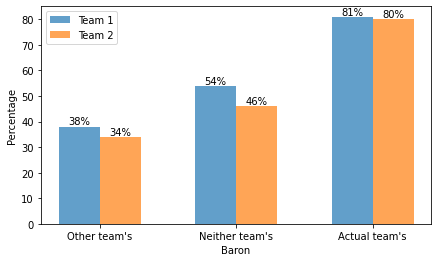

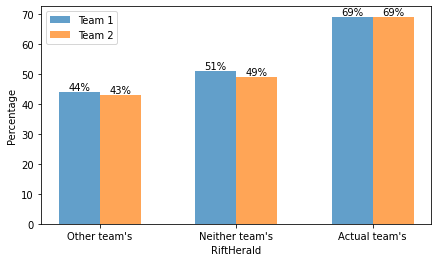

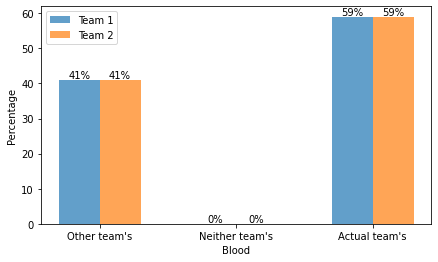

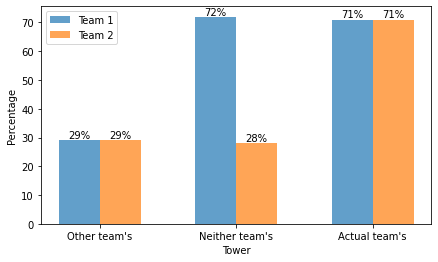

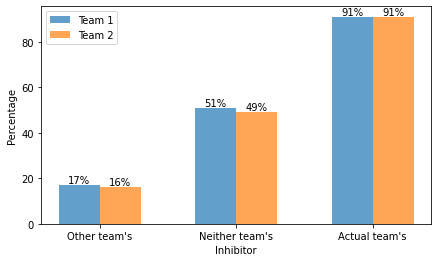

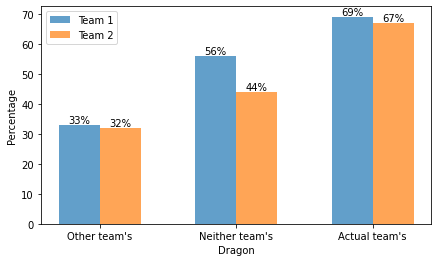

[None, None, None, None, None, None]

In [129]:
# Creating a single cell with every graph:

column_names = df_1stwr.columns
values = [name.split("first")[1].split(" (")[0] for name in column_names]
unique_values = list(set(values))
unique_values

[single_objective_analysis(obj) for obj in unique_values]

Putting it all in a single cell:

<Figure size 1224x576 with 0 Axes>

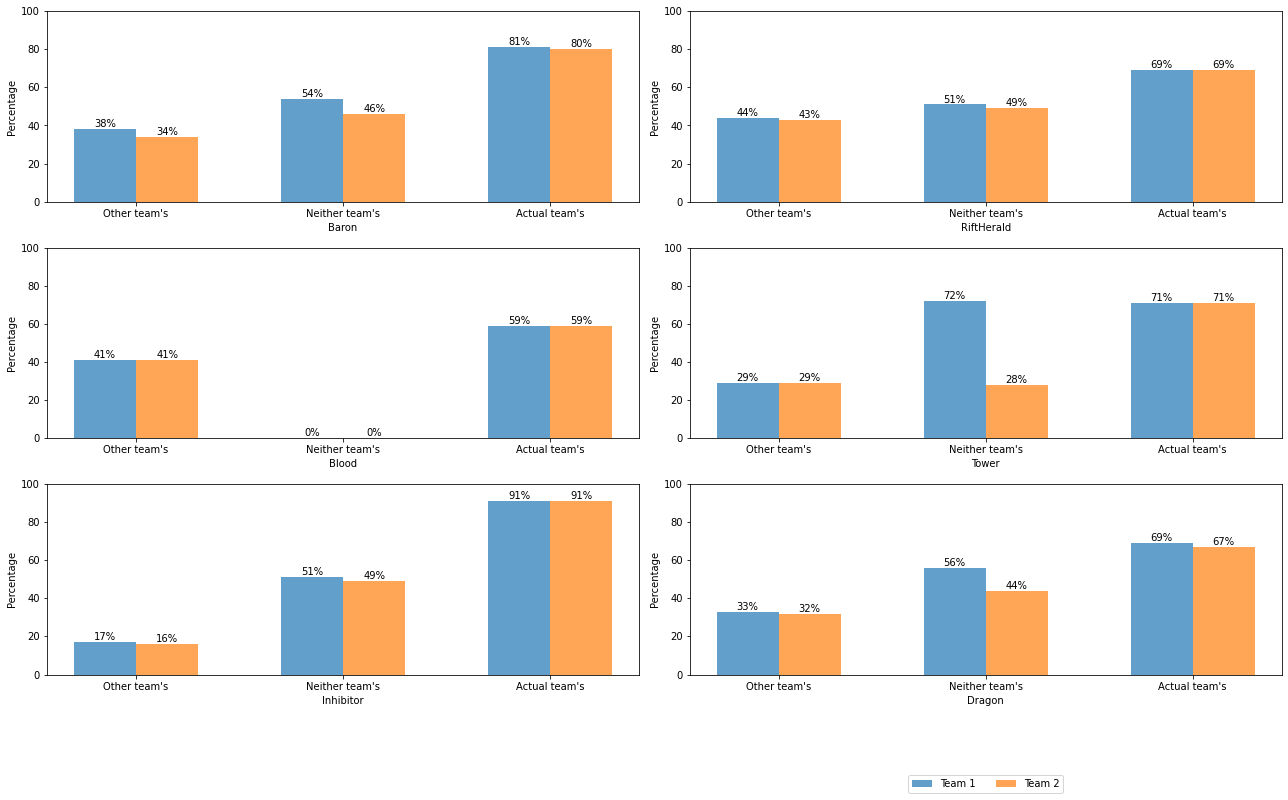

In [130]:
def objective_analysis(ax, objective):
    columns_chosen = [word for word in df_1stwr.columns if objective in word]
    
    df_graph = df_1stwr[columns_chosen]

    data = np.concatenate((df_graph.iloc[:3].values, df_graph.iloc[3:6].values), axis=0)

    labels = ["Other team's", "Neither team's", "Actual team's"]
    x = np.arange(len(labels))
    width = 0.3

    bars1 = ax.bar(x - width/2, data[0, :3], width, label='Team 1', alpha=0.7)
    bars2 = ax.bar(x + width/2, data[0, -3:], width, label='Team 2', alpha=0.7)
    
    ax.set_ylabel('Percentage')
    ax.set_xlabel(objective)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

    # Add percentage labels on each bar
    for bar1, bar2 in zip(bars1, bars2):
        ax.text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height(), f'{int(bar1.get_height())}%', ha='center', va='bottom')
        ax.text(bar2.get_x() + bar2.get_width() / 2, bar2.get_height(), f'{int(bar2.get_height())}%', ha='center', va='bottom')

    ax.set_ylim(top=100)
  

plt.figure(figsize=(17, 8))
# Create the subplot grid
num_plots = len(unique_values)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 10))

# Fill the subplots with the graphs
for i, objective in enumerate(unique_values):
    row = i // num_cols
    col = i % num_cols
    if num_rows == 1:
        ax = axes[col]
    else:
        ax = axes[row, col]
    objective_analysis(ax, objective)

# Adjust the layout of the subplots
plt.tight_layout()

# Move the legend outside the axes
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=2)

# Show the plot
plt.show()



OBS: Winning without taking towers/inhibs makes sense since it can be a forfeit

# Step two: correlation between objectives
- Between first objectives and win
- Among first objectives
- Between objective kills and win

Remember:

    - First objectives: nominal
    - Win: dichotomous
    - Objective kills: nominal

The heatmap was trickier than i thought. I faced a problem with creating a discrete color map, since heatmap always normalizes the data to color it. I fixed it by setting vmin and vmax, preventing it from normalizing.


Would also want to thank the community for helping me:

https://datascience.stackexchange.com/questions/122551/heatmap-not-respecting-the-color-bounds/122666#122666

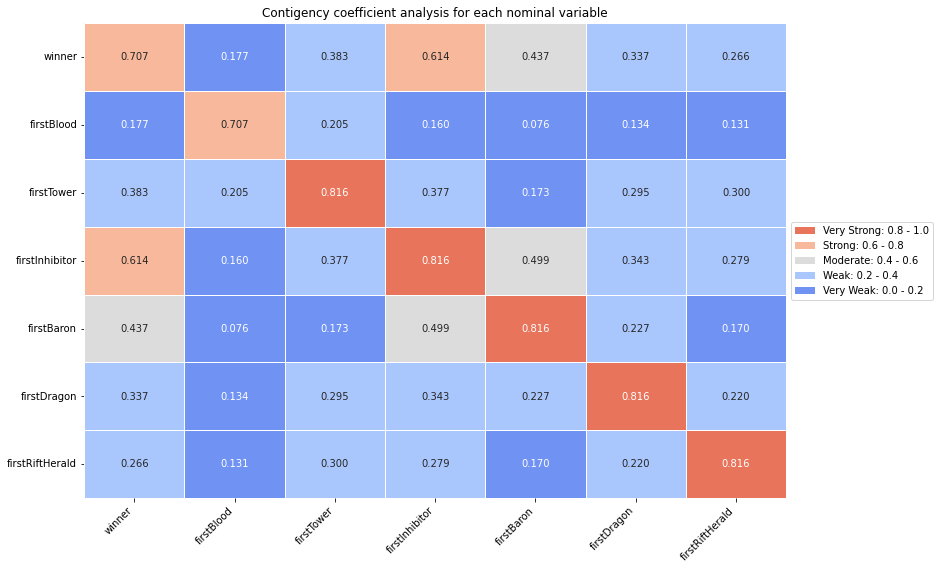

In [131]:
from scipy.stats import chi2_contingency
# Getting columns:
kill_columns = [column for column in df.columns if 'Kills' in column]
first_objectives = [column for column in df.columns if 'first' in column]

df_corr = df[['winner']+kill_columns+first_objectives]


def chi2_analysis(variable1,variable2):
    contingency_table = pd.crosstab(variable1,variable2)
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.values.sum()
    contingency_coef = np.sqrt(chi2/(chi2+n))
    return contingency_coef



import seaborn as sns

from matplotlib.colors import ListedColormap

variables = ['winner'] + first_objectives
n_variables = len(variables)
df_matrix = np.zeros((n_variables, n_variables))

for i in range(n_variables):
    for j in range(n_variables):
        result = chi2_analysis(df_corr[variables[i]], df_corr[variables[j]])
        df_matrix[i, j] = result

category_bounds = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
categories = ['Very Weak', 'Weak', 'Moderate', 'Strong', 'Very Strong']

# Creating a DataFrame from the matrix
df_heatmap = pd.DataFrame(df_matrix, index=variables, columns=variables)

# Custom color map
colors = sns.color_palette('coolwarm', len(categories))
cmap = ListedColormap(colors)


fig, ax = plt.subplots(figsize=(15, 8))


sns.heatmap(df_matrix,
            cmap=cmap,
            fmt=".3f",
            cbar=False,
            ax=ax,
            linecolor='white',
            vmin=0,
            vmax=1,
           annot = True)


# Adjust the position of the lines indicating the edges of the rectangles
ax.hlines(np.arange(n_variables+1), *ax.get_xlim(), color='white', linewidth=1)
ax.vlines(np.arange(n_variables+1), *ax.get_ylim(), color='white', linewidth=1)

ax.set_xticks(np.arange(df_matrix.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_matrix.shape[0]) + 0.5, minor=False)

# Configure the tick labels
ax.set_xticklabels(df_heatmap.columns, rotation=45, ha="right")
ax.set_yticklabels(df_heatmap.index, rotation=0)

# Title
ax.set_title('Contigency coefficient analysis for each nominal variable')


# Discrete legend
legend_labels = [f'{category}: {category_bounds[i]:.1f} - {category_bounds[i+1]:.1f}' for i, category in enumerate(categories)]
legend_elements = [plt.Rectangle((0, 0), 1, 1, fc=colors[i]) for i in range(len(categories))]

# Reversing the legends order was necessay for some reason
legend_elements = legend_elements[::-1]
legend_labels = legend_labels[::-1]

ax.legend(handles=legend_elements, labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the spacing to avoid overlapping y-axis labels
plt.subplots_adjust(left=0.25, top=0.95)

plt.show()

In [132]:
df_corr[first_objectives[0]].name

'firstBlood'

In [133]:
for first_objective_1 in first_objectives:
    for first_objective_2 in first_objectives:
        if first_objective_1 == first_objective_2:
            continue
        else:
            chi2_analysis(df_corr[first_objective_1],df_corr[first_objective_2])


In [134]:
df.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [135]:
# First step is to transform them in binary

df_binary = pd.DataFrame(columns=['fb', 'ft'])


df_binary['fb'] = pd.concat

# winner_fb = pd.concat([df[df['winner'] == 1]['t1_towerKills'],df[df['winner'] == 2]['t2_towerKills']])

# loser_ft = pd.concat([df[df['winner'] == 1]['t2_towerKills'],df[df['winner'] == 2]['t1_towerKills']])



df_binary = df[['firstTower','firstBlood']].replace({1:1,2:0})


from sklearn.metrics import matthews_corrcoef

# Calcular a correlação de Matthews
correlation = matthews_corrcoef(df_binary['firstTower'], df_binary['firstBlood'])




print(correlation)

0.20963276215956478


In [136]:
# Create a matrix of: winner, firstBlood, firstTower, firstInhib, firstBaron, firstDragon, firstHerald

In [137]:
winner_towers = pd.concat([df[df['winner'] == 1]['t1_towerKills'],df[df['winner'] == 2]['t2_towerKills']])

loser_towers = pd.concat([df[df['winner'] == 1]['t2_towerKills'],df[df['winner'] == 2]['t1_towerKills']])


winner_towers = winner_towers.to_frame()

winner_towers['winner'] = 1
loser_towers = loser_towers.to_frame()
loser_towers['winner'] = 0
teste = pd.concat([winner_towers,loser_towers])


correlation = np.corrcoef(teste[0], teste['winner'])[0, 1]

print(correlation)

0.8088268136506851


# Step three: ML modeling and win prediction
1) Predict the team winner with every piece of information we have on our disposal



2) It would be fun (especially for gamblers) to predict the winner with the minimal information available. I will do it using only team picks, bans, first blood, and first tower, as these pieces of information can be seen beforehand.

Removing irrelevant columns and getting target array. Features will be generated later

In [138]:
# df_model represents the previous df right after removing the remaked matches
sum_columns = [columns for columns in df.columns if 'sum' in columns]
target = df['winner']
df_model.drop(['gameId','creationTime','seasonId','winner']+bans_t1+bans_t2,axis=1, inplace=True)

I personally dont like the following approach, since different pick orders will be interpreted differently, but im curious to get the difference between a model with this problem and without it (for now i thought about sorting the picks)

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


def model_and_results(features,target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    model = RandomForestClassifier()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    print("Matriz de Confusão:")
    #conf_matrix = confusion_matrix(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))


    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)


    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)


    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)


    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)
    
    importances = model.feature_importances_

    # Criar um DataFrame para visualizar as importâncias
    importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': importances})
    importance_df = importance_df.sort_values('Importance', ascending=False)
    
    # Imprimir as importâncias das variáveis
    print('\n\n',importance_df)


In [140]:
print('With every bit of information:')
features = df_model

model_and_results(features,target)

With every bit of information:
Matriz de Confusão:
[[4975  109]
 [ 109 4844]]
Accuracy: 0.9782803626581648
Precision: 0.9785601888276947
Recall: 0.9785601888276947
F1-Score: 0.9785601888276947


                Feature  Importance
22       t1_towerKills    0.200553
42       t2_towerKills    0.171456
43   t2_inhibitorKills    0.153077
23   t1_inhibitorKills    0.120060
3       firstInhibitor    0.100099
45      t2_dragonKills    0.035855
44       t2_baronKills    0.033128
25      t1_dragonKills    0.023820
5          firstDragon    0.018942
4           firstBaron    0.017612
0         gameDuration    0.014791
2           firstTower    0.014349
24       t1_baronKills    0.013028
26  t1_riftHeraldKills    0.004254
46  t2_riftHeraldKills    0.004017
10         t1_champ2id    0.003739
27         t2_champ1id    0.003707
39         t2_champ5id    0.003695
30         t2_champ2id    0.003690
33         t2_champ3id    0.003666
7          t1_champ1id    0.003576
16         t1_champ4id    0.003533

In [141]:
# Removing ammount of kills to be less specific

features = df_model.drop(kill_columns, axis=1)

model_and_results(features,target)

Matriz de Confusão:
[[4638  446]
 [ 476 4477]]
Accuracy: 0.9081398824349906
Precision: 0.9069221744231521
Recall: 0.9122738001573564
F1-Score: 0.9095901157089625


             Feature  Importance
3    firstInhibitor    0.379642
4        firstBaron    0.111775
2        firstTower    0.078616
0      gameDuration    0.065199
5       firstDragon    0.045036
6   firstRiftHerald    0.018594
25      t2_champ2id    0.015739
10      t1_champ2id    0.015592
31      t2_champ4id    0.015479
16      t1_champ4id    0.015478
34      t2_champ5id    0.015441
13      t1_champ3id    0.015368
28      t2_champ3id    0.015204
19      t1_champ5id    0.015197
7       t1_champ1id    0.015194
22      t2_champ1id    0.015097
1        firstBlood    0.009985
33   t2_champ4_sum2    0.007399
9    t1_champ1_sum2    0.007367
24   t2_champ1_sum2    0.007354
30   t2_champ3_sum2    0.007319
15   t1_champ3_sum2    0.007263
36   t2_champ5_sum2    0.007177
18   t1_champ4_sum2    0.007156
27   t2_champ2_sum2    0.007138
12 

Results are incredible! But let's dig a little more. I want to sort the picks to check if it's relevant algorithm-wise:





(After some further research, it looks like random forest already does this work, but it was still worth the try)

In [142]:
df_model['comp_1'] = df_model[champs_t1].apply(sorted, axis=1)
df_model['comp_2'] = df_model[champs_t2].apply(sorted, axis=1)
split_1 = pd.DataFrame(df_model['comp_1'].to_list(), columns = champs_t1)
split_2 = pd.DataFrame(df_model['comp_2'].to_list(), columns = champs_t2)
split_sorted = pd.concat([split_1,split_2],axis=1)
#df_model
sorted_features = pd.concat([df_model.drop(['comp_1','comp_2']+champs_t1+champs_t2,axis=1).reset_index(drop=True),split_sorted],axis=1)
sorted_features

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1_sum1,t1_champ1_sum2,t1_champ2_sum1,...,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,1949,2,1,1,1,1,2,12,4,3,...,8,11,96,112,432,104,122,238,412,498
1,1851,1,1,1,0,1,1,7,4,12,...,10,35,39,76,119,25,54,92,120,157
2,1493,2,1,1,1,2,0,4,7,11,...,18,38,68,141,267,22,24,69,126,412
3,1758,1,1,1,1,1,0,4,12,4,...,29,36,57,61,63,19,22,90,92,412
4,2094,2,1,1,1,1,0,4,12,11,...,19,29,40,119,134,37,38,51,59,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50176,1944,1,2,2,0,2,0,12,4,4,...,19,64,91,429,432,40,45,67,79,83
50177,3304,1,1,2,2,2,2,4,14,4,...,18,31,32,90,412,45,75,89,102,429
50178,2156,2,2,2,0,1,0,11,4,7,...,18,68,81,141,432,1,33,43,99,119
50179,1475,2,2,2,0,2,0,11,4,4,...,99,121,201,236,420,11,21,25,30,56


In [143]:
print('Now with picks in order')

model_and_results(sorted_features.drop(kill_columns,axis=1),target)

Now with picks in order
Matriz de Confusão:
[[4630  454]
 [ 471 4482]]
Accuracy: 0.9078409883431304
Precision: 0.9076651636933935
Recall: 0.9107002360346184
F1-Score: 0.9091801669121257


             Feature  Importance
3    firstInhibitor    0.397914
4        firstBaron    0.107095
2        firstTower    0.075161
0      gameDuration    0.067538
5       firstDragon    0.038691
6   firstRiftHerald    0.019772
28      t1_champ2id    0.015009
34      t2_champ3id    0.014984
29      t1_champ3id    0.014942
33      t2_champ2id    0.014900
30      t1_champ4id    0.014849
32      t2_champ1id    0.014434
35      t2_champ4id    0.014386
27      t1_champ1id    0.014002
36      t2_champ5id    0.013748
31      t1_champ5id    0.013731
1        firstBlood    0.008058
18   t2_champ1_sum2    0.007631
22   t2_champ3_sum2    0.007512
20   t2_champ2_sum2    0.007484
16   t1_champ5_sum2    0.007466
8    t1_champ1_sum2    0.007466
12   t1_champ3_sum2    0.007313
14   t1_champ4_sum2    0.007307
24   t2_cha

It was a little bit better, so that concludes that we should rearrange our data accordingly

In [144]:
print('Picks with first main objectives')
model_and_results(sorted_features[champs_t1+champs_t2+first_objectives],target)

Picks with first main objectives
Matriz de Confusão:
[[4607  477]
 [ 467 4486]]
Accuracy: 0.9059479924280164
Precision: 0.9079621600315333
Recall: 0.9061762391817466
F1-Score: 0.9070683205355383


             Feature  Importance
12   firstInhibitor    0.425068
13       firstBaron    0.127744
11       firstTower    0.082874
14      firstDragon    0.042497
7       t2_champ3id    0.030526
6       t2_champ2id    0.030418
2       t1_champ3id    0.030087
8       t2_champ4id    0.029829
1       t1_champ2id    0.029492
3       t1_champ4id    0.029294
5       t2_champ1id    0.028946
0       t1_champ1id    0.028696
4       t1_champ5id    0.027624
9       t2_champ5id    0.027350
15  firstRiftHerald    0.019927
10       firstBlood    0.009629


It was impressive how first objectives are so relevant to the game wins. But, for a gambler stand point, let's suppose we choose to gamble after we see the first blood, tower and dragon:

In [145]:
print('Picks with early objectives')
model_and_results(sorted_features[['firstBlood','firstTower','firstDragon']+champs_t1+champs_t2],target)

Picks with early objectives
Matriz de Confusão:
[[3693 1391]
 [1515 3438]]
Accuracy: 0.7104712563514994
Precision: 0.7091013824884793
Recall: 0.72639653815893
F1-Score: 0.717644772638943


         Feature  Importance
1    firstTower    0.132918
2   firstDragon    0.090031
10  t2_champ3id    0.079915
5   t1_champ3id    0.078787
4   t1_champ2id    0.078510
9   t2_champ2id    0.077838
11  t2_champ4id    0.077567
6   t1_champ4id    0.076855
3   t1_champ1id    0.075503
8   t2_champ1id    0.075074
12  t2_champ5id    0.071110
7   t1_champ5id    0.069026
0    firstBlood    0.016865


Thats a pretty decent result. With only picks, first blood and first tower, we have 71% accuracy to predict the winner. Let me check if summoners are relevant

In [146]:
model_and_results(sorted_features[['firstBlood','firstTower','firstDragon']+champs_t1+champs_t2+sum_columns],target)

Matriz de Confusão:
[[3693 1391]
 [1485 3468]]
Accuracy: 0.7134601972701007
Precision: 0.7132097334878331
Recall: 0.72639653815893
F1-Score: 0.7197427402065874


            Feature  Importance
1       firstTower    0.127852
2      firstDragon    0.081857
10     t2_champ3id    0.040856
5      t1_champ3id    0.040462
4      t1_champ2id    0.040406
9      t2_champ2id    0.040389
11     t2_champ4id    0.040101
6      t1_champ4id    0.039988
8      t2_champ1id    0.038538
3      t1_champ1id    0.038357
12     t2_champ5id    0.036957
7      t1_champ5id    0.036907
18  t1_champ3_sum2    0.020463
26  t2_champ2_sum2    0.020301
28  t2_champ3_sum2    0.020245
14  t1_champ1_sum2    0.020207
32  t2_champ5_sum2    0.020058
24  t2_champ1_sum2    0.019976
22  t1_champ5_sum2    0.019904
20  t1_champ4_sum2    0.019896
30  t2_champ4_sum2    0.019864
16  t1_champ2_sum2    0.019822
17  t1_champ3_sum1    0.018354
13  t1_champ1_sum1    0.018266
31  t2_champ5_sum1    0.018137
19  t1_champ4_sum1    0.018040


It was actually a relevant improvement

In [147]:
print('teste_atualização')

teste_atualização


# Using Model and Optimization

In [148]:
%run ../../ModelAndOptimization/Model_And_Optimization.ipynb

In [149]:
target = (target - 1)

In [150]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


# models = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(),
#          XGBClassifier(), SVC()]

models = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(),
         XGBClassifier()]

# param_grids = [
#     {'C': [0.1, 1, 10]},  # Parameter grid for LogisticRegression
#     {'max_depth': [None, 5, 10], 'n_estimators': [50, 100, 150]},  # Parameter grid for RandomForestClassifier
#     {'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [50, 100, 150]},  # Parameter grid for GradientBoostingClassifier
#     {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},  # Parameter grid for KNeighborsClassifier
#     {'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]},  # Parameter grid for XGBClassifier
#     {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}  # Parameter grid for SVC
# ]

param_grids = [
    {'C': [0.1, 1, 10]},  # Parameter grid for LogisticRegression
    {'max_depth': [None, 5, 10], 'n_estimators': [50, 100, 150]},  # Parameter grid for RandomForestClassifier
    {'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [50, 100, 150]},  # Parameter grid for GradientBoostingClassifier
    {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},  # Parameter grid for KNeighborsClassifier
    {'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]},  # Parameter grid for XGBClassifier
]

model_comparison = ModelOptimization(models = models, param_grids = param_grids,
                                     scoring = 'accuracy', top_n = 3, search_method ='bayesian')
model_comparison.fit(features, target)

Fitting model 1/5: LogisticRegression
Fitting model 2/5: RandomForestClassifier
Fitting model 3/5: GradientBoostingClassifier
Fitting model 4/5: KNeighborsClassifier
Fitting model 5/5: XGBClassifier

Model ranking based on scores:
Rank 1: RandomForestClassifier - Score: 1.0000
Rank 2: XGBClassifier - Score: 0.9622
Rank 3: GradientBoostingClassifier - Score: 0.9081



Optimizing hyperparameters for model RandomForestClassifier
Best score for RandomForestClassifier: 0.9059
Params: OrderedDict([('max_depth', None), ('n_estimators', 50)])


Optimizing hyperparameters for model XGBClassifier
Best score for XGBClassifier: 0.9060
Params: OrderedDict([('learning_rate', 0.1), ('max_depth', 5), ('n_estimators', 100)])


Optimizing hyperparameters for model GradientBoostingClassifier
Best score for GradientBoostingClassifier: 0.9029
Params: OrderedDict([('learning_rate', 0.01), ('n_estimators', 150)])




ModelOptimization(models=[LogisticRegression(), RandomForestClassifier(),
                          GradientBoostingClassifier(), KNeighborsClassifier(),
                          XGBClassifier(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=None,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=None, feature_types=None,
                                        gamma=None, gp...
                                        random_state=None, ...)],
                  param_grids=[{'C': [0.1, 1, 10]},
                               {'max_depth': [None, 5, 10],
                                'n_estimators': [50, 100, 150]},
                               {'learning_rate': [0.1, 0